In [15]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import os
import missingno as msno

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier,GradientBoostingClassifier,BaggingClassifier
from xgboost import XGBClassifier

# Dataset Context : 

## Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

## Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

# The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents


## Column Metadata  :

| Column | Description | Potential Values |
| :--- | :--- | :--- |
| **customerID** | Unique identifier for the customer | String |
| **gender** | Whether the customer is a male or a female | Male, Female |
| **SeniorCitizen** | Whether the customer is a senior citizen or not | 1, 0 |
| **Partner** | Whether the customer has a partner or not | Yes, No |
| **Dependents** | Whether the customer has dependents or not | Yes, No |
| **tenure** | Number of months the customer has stayed with the company | Numeric |
| **PhoneService** | Whether the customer has a phone service or not | Yes, No |
| **MultipleLines** | Whether the customer has multiple lines or not | Yes, No, No phone service |
| **InternetService** | Customer’s internet service provider | DSL, Fiber optic, No |
| **OnlineSecurity** | Whether the customer has online security or not | Yes, No, No internet service |
| **OnlineBackup** | Whether the customer has online backup or not | Yes, No, No internet service |
| **DeviceProtection** | Whether the customer has device protection or not | Yes, No, No internet service |
| **TechSupport** | Whether the customer has tech support or not | Yes, No, No internet service |
| **StreamingTV** | Whether the customer has streaming TV or not | Yes, No, No internet service |
| **StreamingMovies** | Whether the customer has streaming movies or not | Yes, No, No internet service |
| **Contract** | The contract term of the customer | Month-to-month, One year, Two year |
| **PaperlessBilling** | Whether the customer has paperless billing or not | Yes, No |
| **PaymentMethod** | The customer’s payment method | Electronic check, Mailed check, Bank transfer, Credit card |
| **MonthlyCharges** | The amount charged to the customer monthly | Numeric |
| **TotalCharges** | The total amount charged to the customer | Numeric |
| **Churn** | Whether the customer churned or not | Yes, No |


In [16]:
# Load data from the correct place and check for errors when loading

file_path = os.path.join('..','datasets','telco-churn-dataset.csv') # The .. to move one level up and search the path

try : 
    df = pd.read_csv(file_path)
except Exception as e:
    print(f'An Unexpected Error occured : \n Details : {e}')



In [17]:
df.shape # We got 21 columns and 7043 rows to work with

(7043, 21)

In [18]:
df.columns
# These are different attirbutes which will be used to find which one affects the churning rate of the customers the most.

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='str')

In [19]:
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [21]:
# No anamolies detected till now 

In [22]:
df.info() # This dataset is clean and there is no missing values to impute . # Good!!!

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [23]:
df.describe() # Not that much useful at this stage as many numeric dtypes are still to be converted 
# Other things like kurt , skewness and correlation will be checked later .

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


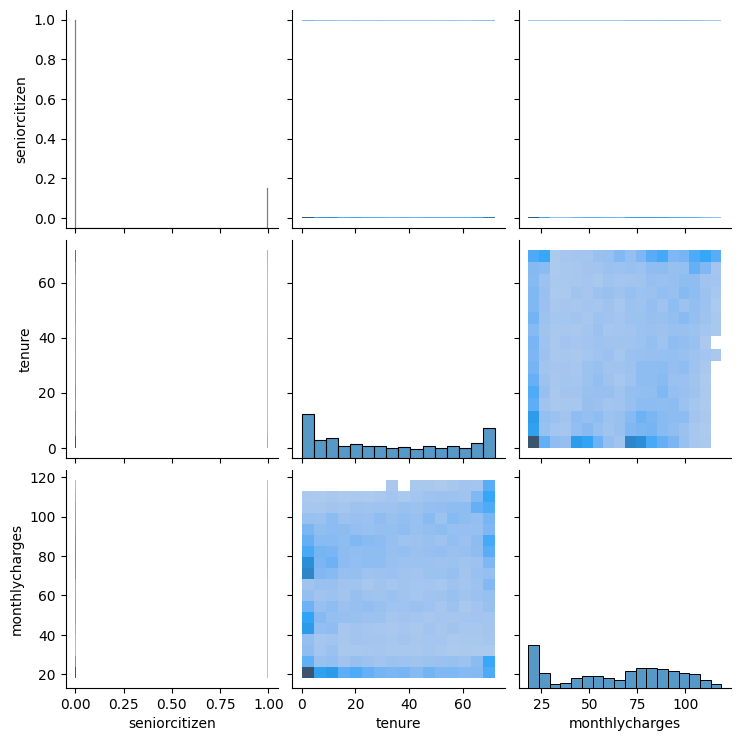

In [29]:
sns.pairplot(data=df,kind='hist')
plt.show()

In [25]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_') # Some header cleaning

In [26]:
# Other Important things found : 

'''
1. Gender is a string we need to encode this to numeric value .
2. Partner , Dependents , PhoneService, etc. must also be encoded with their respictive startegies .
3. Churn and TotalCharges are also in str type so we need to turn it into numeric value
We need to examine the number of unique value for each of the columns to reach a decision on what numerical method to use .

'''

'\n1. Gender is a string we need to encode this to numeric value .\n2. Partner , Dependents , PhoneService, etc. must also be encoded with their respictive startegies .\n3. Churn and TotalCharges are also in str type so we need to turn it into numeric value\nWe need to examine the number of unique value for each of the columns to reach a decision on what numerical method to use .\n\n'

In [27]:
# Univariate analaysis 

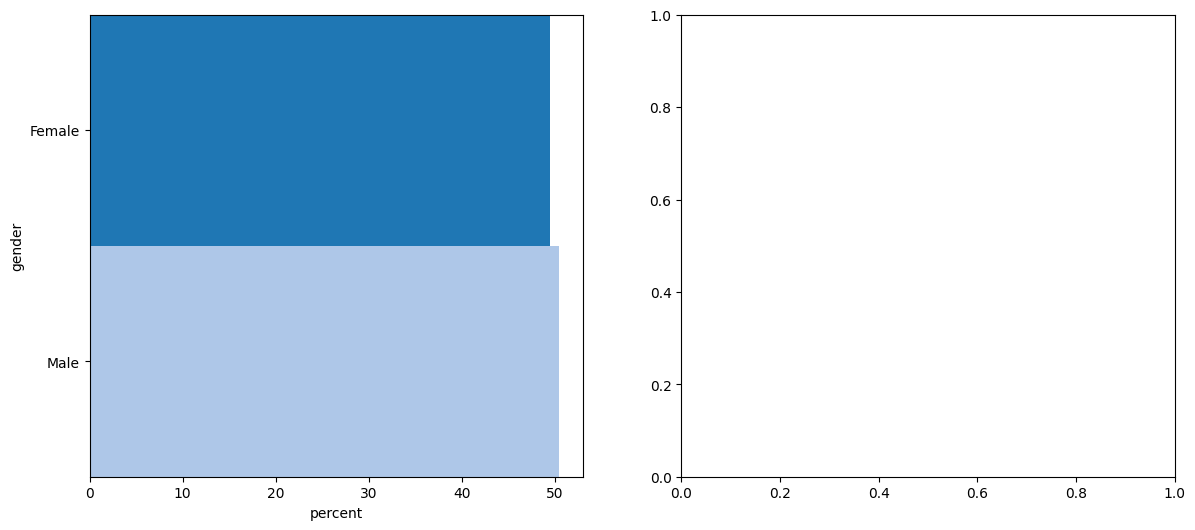

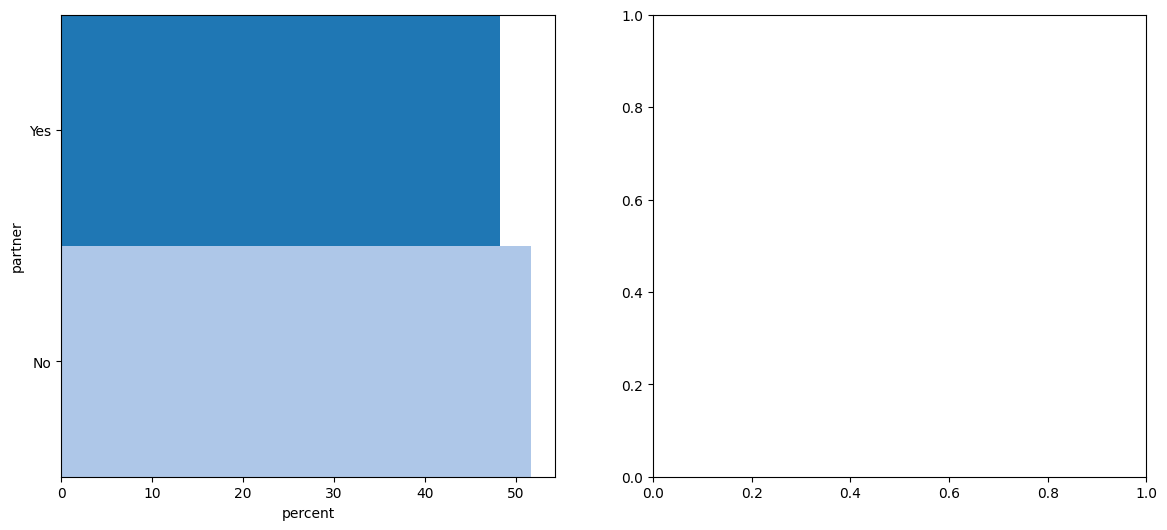

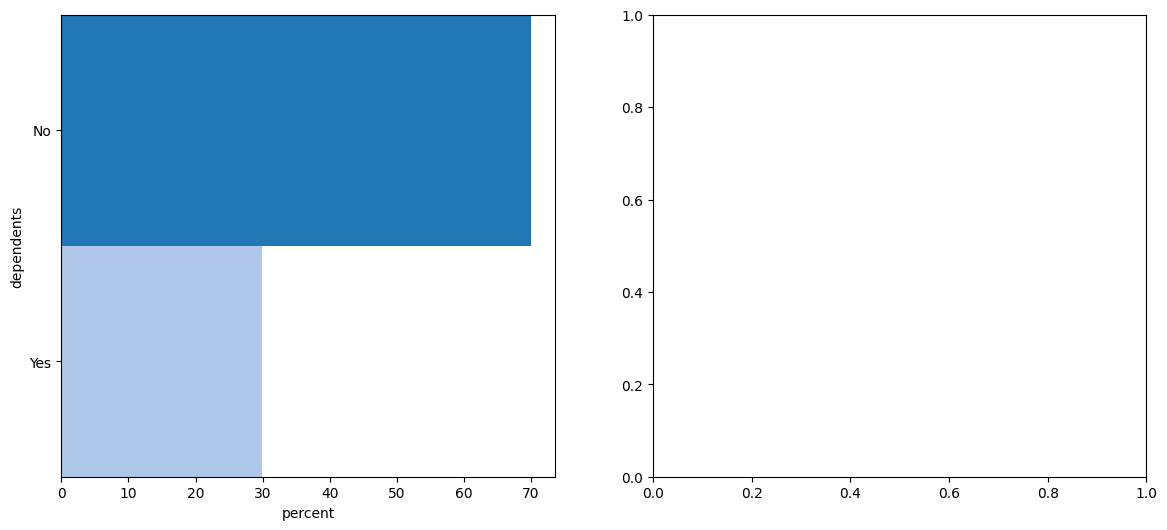

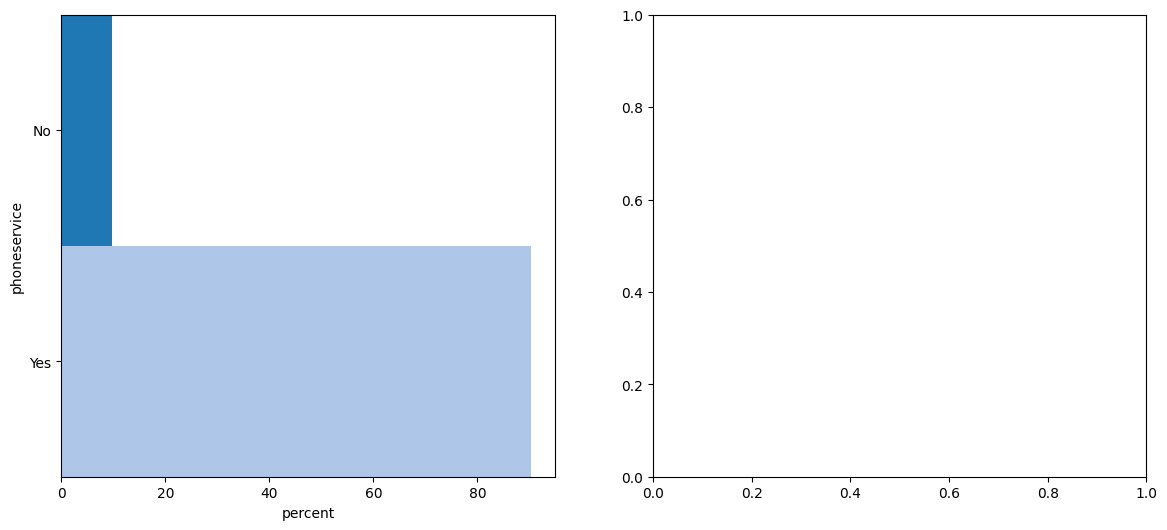

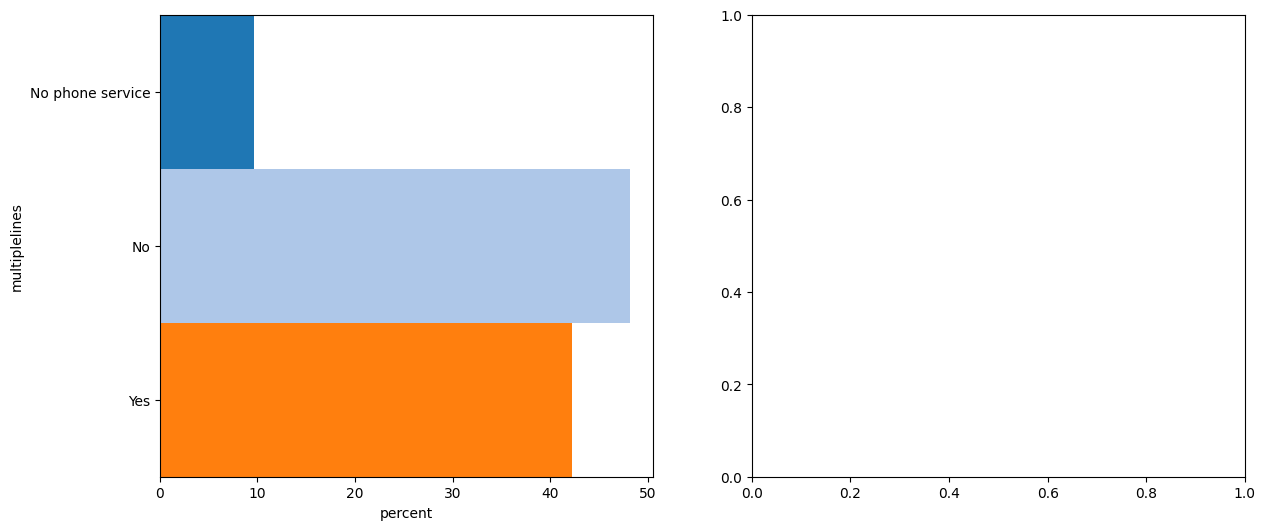

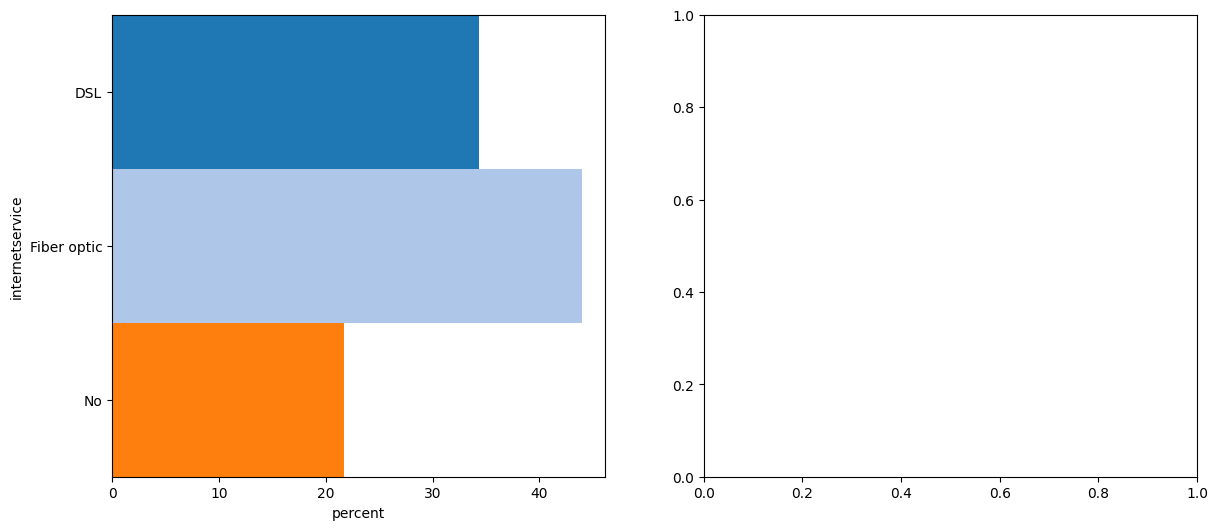

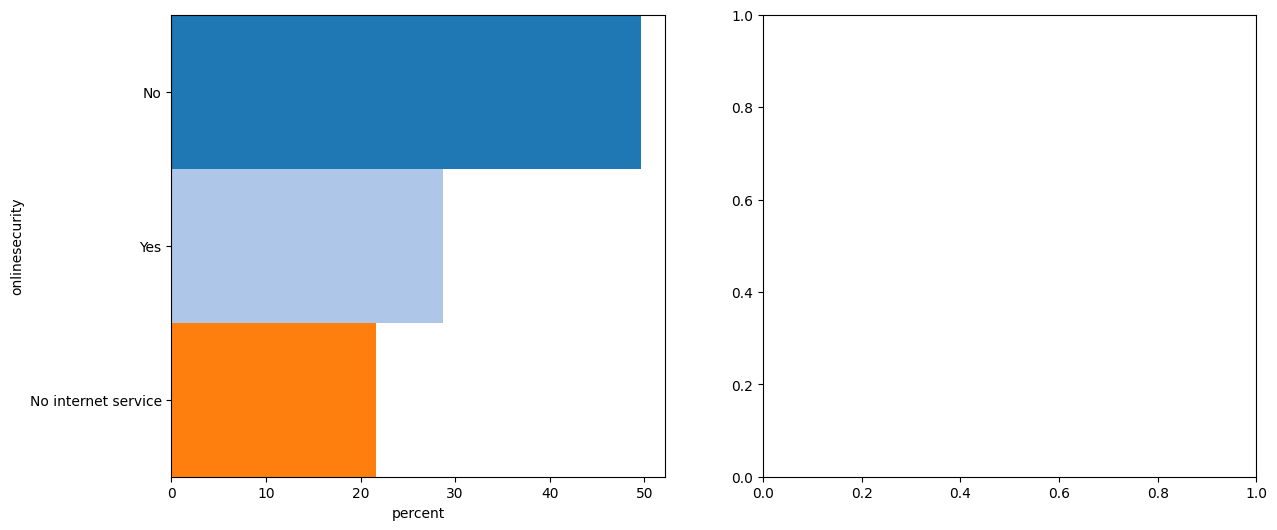

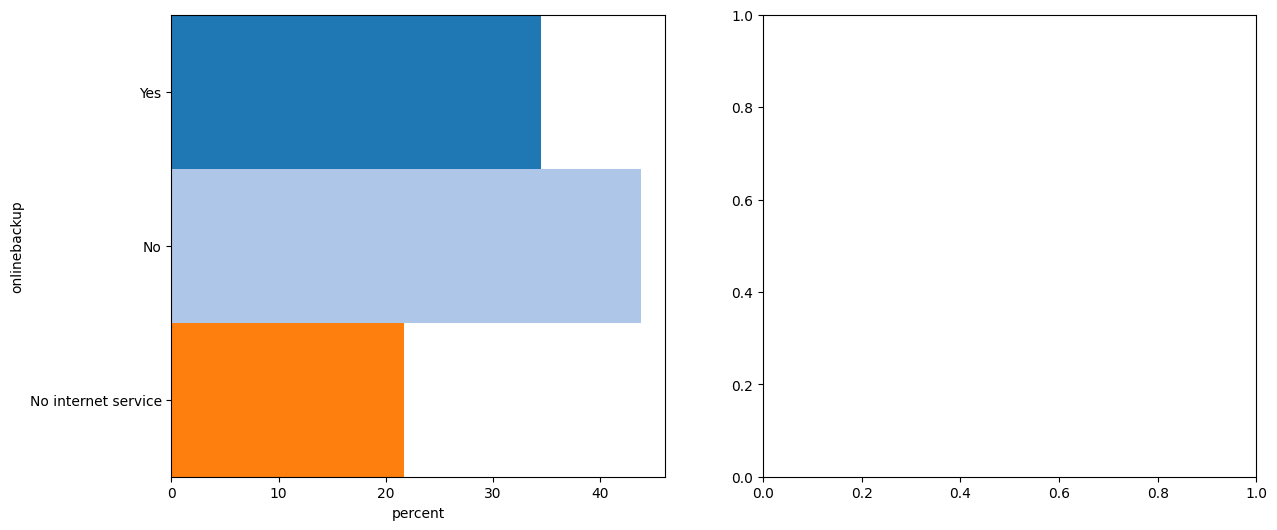

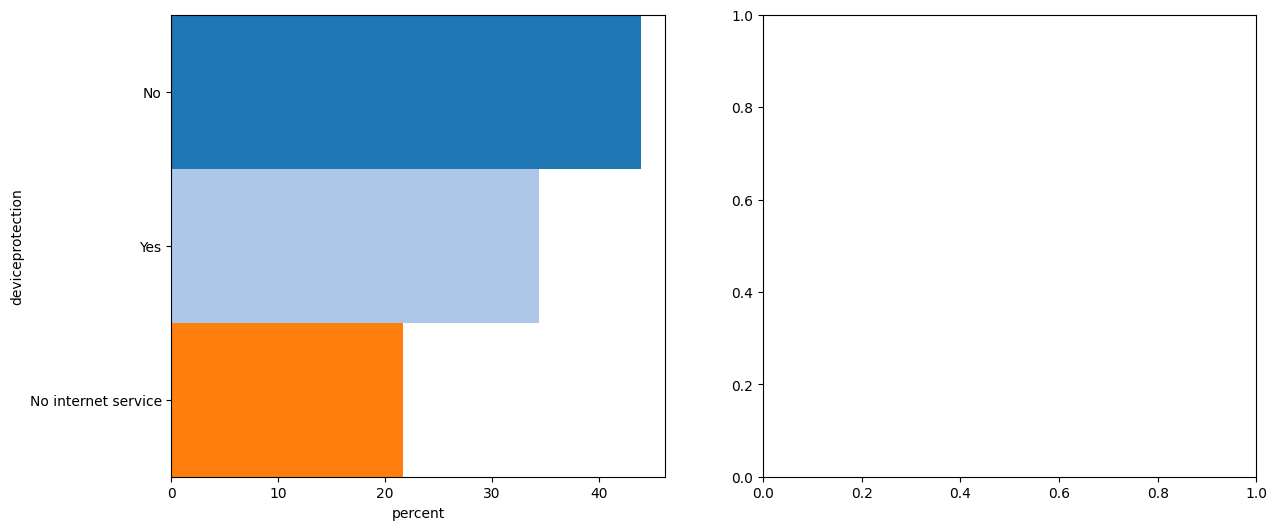

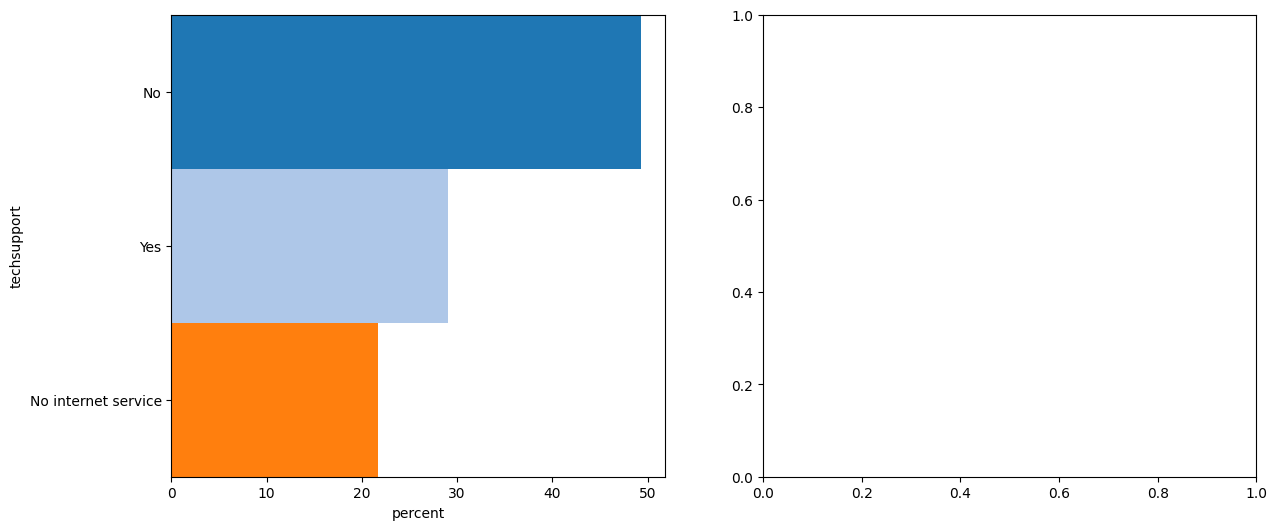

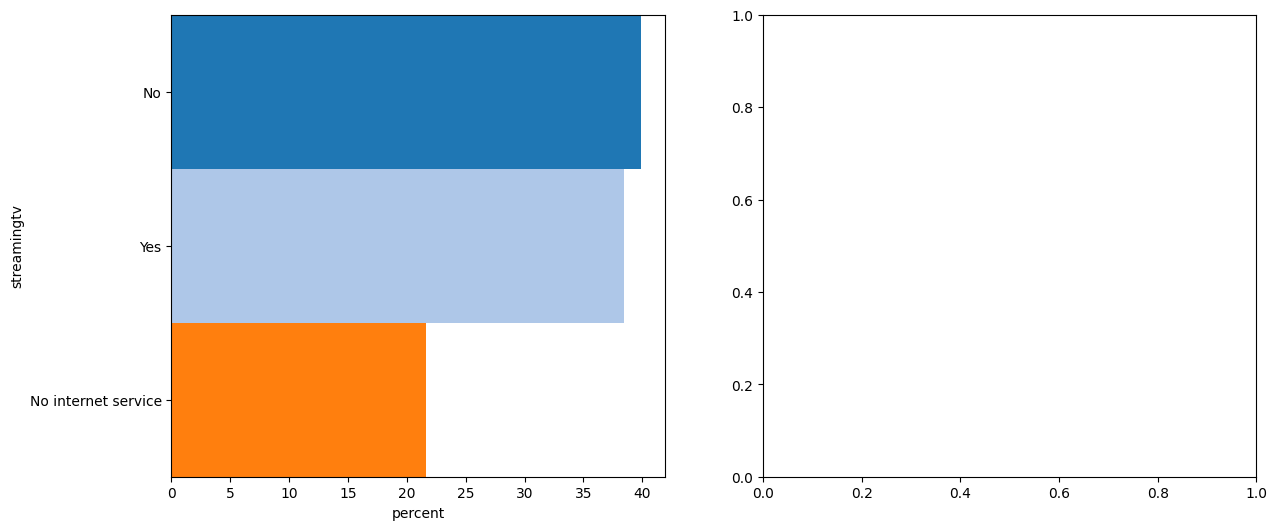

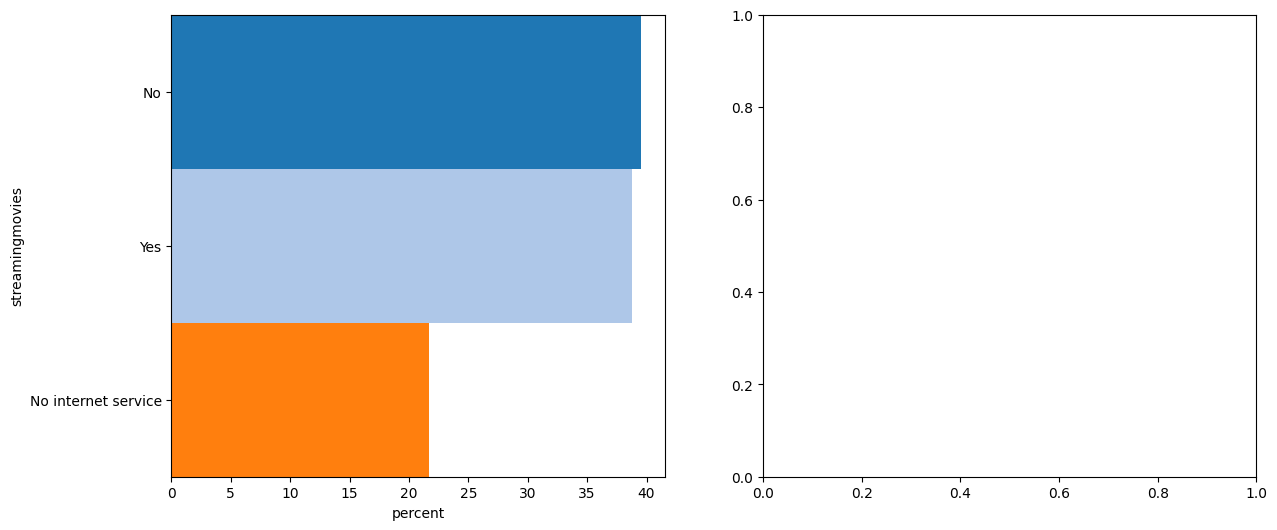

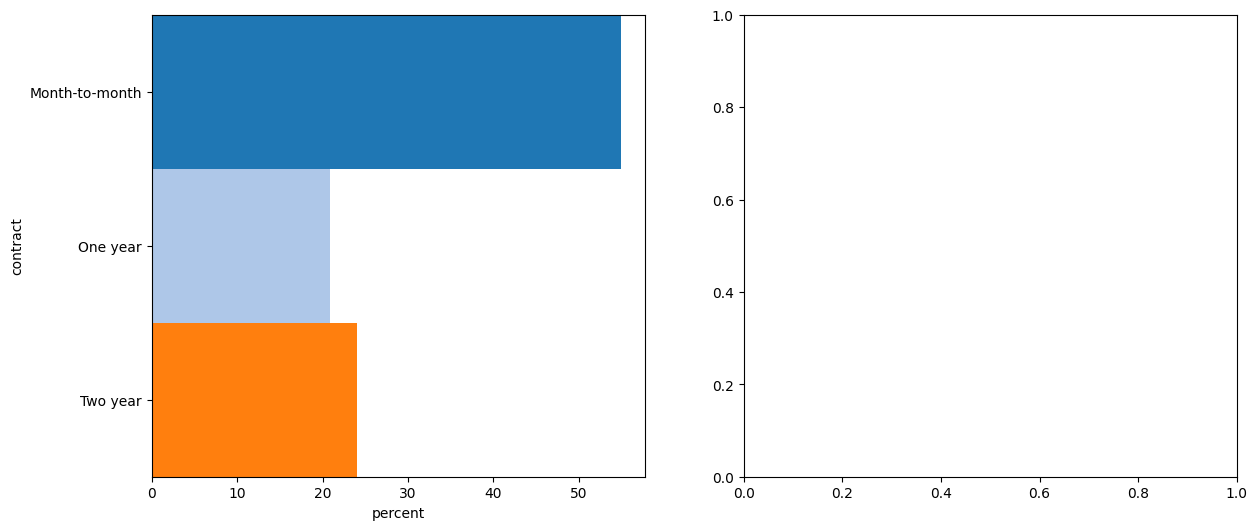

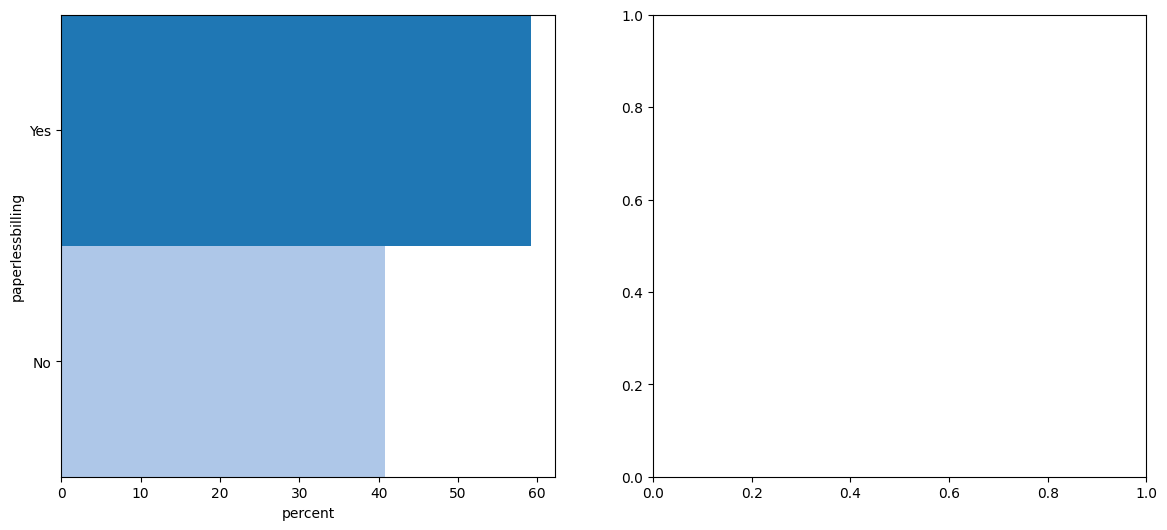

In [ ]:
x = 'partner'

for x in df.drop(columns=['customerid','tenure','monthlycharges','totalcharges','seniorcitizen']).select_dtypes('str').columns :

    plt.figure(figsize=(14,6))

    plt.subplot(121)
    sns.countplot(
                    data = df,
                    y = x,
                    stat = 'percent',
                    gap = 0,
                    palette='tab20',
                    hue = x,
                    width = 1,
                    saturation=1
    )

    plt.subplot(122)
    px.box(
                data_frame=df,
                x = x
    )

    plt.show()


In [30]:
# Lets check the unique values for each columns

# This below step can be skipped for this dataset as we already have the column metadata , but when we less info on the dataset
# we must do this to get a good idea of what we are deaking with.

def check_unique():

    higher_unique_values = []
    binary_encoding_columns = []
    tertiary_encoding_columns = []
    other_columns = []

    # Here I drop some value beforehand to save computation as they are numeric or well known that they are unique.
    # We are looking for other Categorical columns with huge number of columns , so If it exists we might need a slighlty different process.

    for x in df.drop(columns=['customerid','tenure','monthlycharges','totalcharges','seniorcitizen']).columns:

        length = len(df[x].unique())

        if length > 10:
            higher_unique_values.append(x)
        else:
            print(f'Column : {x}\nValues : {df[x].unique()}\n')

            match length:

                case 2:
                    binary_encoding_columns.append(x)
                case 3:
                    tertiary_encoding_columns.append(x)
                case _:
                    other_columns.append(x)
        

    print(f'The columns having a huge number of unique values are : {higher_unique_values} ')

    return binary_encoding_columns,tertiary_encoding_columns,other_columns,higher_unique_values

binary_encoding_columns,tertiary_encoding_columns,other_columns,higher_unique_values = check_unique() # <--  The result is checked via terminal or a text editor with notebooks.

Column : gender
Values : <StringArray>
['Female', 'Male']
Length: 2, dtype: str

Column : partner
Values : <StringArray>
['Yes', 'No']
Length: 2, dtype: str

Column : dependents
Values : <StringArray>
['No', 'Yes']
Length: 2, dtype: str

Column : phoneservice
Values : <StringArray>
['No', 'Yes']
Length: 2, dtype: str

Column : multiplelines
Values : <StringArray>
['No phone service', 'No', 'Yes']
Length: 3, dtype: str

Column : internetservice
Values : <StringArray>
['DSL', 'Fiber optic', 'No']
Length: 3, dtype: str

Column : onlinesecurity
Values : <StringArray>
['No', 'Yes', 'No internet service']
Length: 3, dtype: str

Column : onlinebackup
Values : <StringArray>
['Yes', 'No', 'No internet service']
Length: 3, dtype: str

Column : deviceprotection
Values : <StringArray>
['No', 'Yes', 'No internet service']
Length: 3, dtype: str

Column : techsupport
Values : <StringArray>
['No', 'Yes', 'No internet service']
Length: 3, dtype: str

Column : streamingtv
Values : <StringArray>
['No', '

In [31]:
# Conclusion : 
''' 

Fortunately all of the categorical columns have fewer unique values .

Most of the columns have yes/no , yes/no/internet service or phone service 
--> Implying that we need to do some special type of encoding here for these

Also some columns are having 3 - 4 unique values 

Some columns have 

'''

' \n\nFortunately all of the categorical columns have fewer unique values .\n\nMost of the columns have yes/no , yes/no/internet service or phone service \n--> Implying that we need to do some special type of encoding here for these\n\nAlso some columns are having 3 - 4 unique values \n\nSome columns have \n\n'

In [32]:
# Ran this to check the count of each unque entries , and whether the column items are balanced or not.
# The balancedness will be handled ahead of splitting dataset into training and testing sets.

# for x in df.columns:
#     print(df[x].value_counts())
#     print()

In [33]:
# Depending on the len of numeric values and the similarity we divide each columns into different sets

In [34]:
# I handled this inside the unique function above cause we knew the max no of unique value columns was a smaller value.

In [35]:
binary_encoding_columns # <-- We can encode this directly using a binary labelled encoder

['gender',
 'partner',
 'dependents',
 'phoneservice',
 'paperlessbilling',
 'churn']

In [36]:
tertiary_encoding_columns # <-- we will split these columns further 

['multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract']

In [37]:
no_internet_services_columns = [
                                    'onlinesecurity',
                                    'onlinebackup',
                                    'deviceprotection',
                                    'techsupport',
                                    'streamingtv',
                                    'streamingmovies'
] # <-- Specfific columns with same unique values will be handled together
# Will use OrdinalEncoder here with a specific order and then substract the result with -1 to get results.

In [38]:
# For other columns in teritary group we will write custom logic while encoding

In [39]:
other_columns # <-- This will also have custom mapping or Encoding dealt during encoding

['paymentmethod']

In [40]:
higher_unique_values # <-- No Higher Unique valued columns as seen before

[]

In [41]:
# For visualization I am using data wrangler and custom plotting techniques